# Import necessary libraries

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder




# Load and Inspect the Dataset

In [25]:
df = pd.read_csv("bee_dataset.csv")
df

,rainfall_mm,avg_temperature,humidity,num_hives,hive_type,colony_strength,disease_status,experience_years,inspection_frequency,honey_yield_kg
0,859.605698,28.852355,83.993554,40,modern,medium,yes,11,1,2802.221569
1,783.408284,30.818833,79.246337,28,traditional,medium,no,15,1,2554.859644
2,877.722625,24.202865,70.596304,58,traditional,weak,yes,16,9,3382.549193
3,982.763583,28.125938,63.530632,55,traditional,medium,no,17,6,3568.241945
4,771.901595,25.698715,76.982233,28,modern,strong,no,2,5,2522.913516
...,...,...,...,...,...,...,...,...,...,...
495,864.669205,26.437799,90.060929,38,traditional,medium,no,2,4,2814.331600
496,675.530461,30.595373,90.615036,31,modern,weak,no,12,1,2678.035597
497,777.159359,28.281686,82.083662,49,traditional,medium,yes,1,7,2858.384527
498,694.925810,25.857642,80.240625,30,traditional,medium,yes,8,2,2224.454624


In [26]:
df.head()

,rainfall_mm,avg_temperature,humidity,num_hives,hive_type,colony_strength,disease_status,experience_years,inspection_frequency,honey_yield_kg
0,859.605698,28.852355,83.993554,40,modern,medium,yes,11,1,2802.221569
1,783.408284,30.818833,79.246337,28,traditional,medium,no,15,1,2554.859644
2,877.722625,24.202865,70.596304,58,traditional,weak,yes,16,9,3382.549193
3,982.763583,28.125938,63.530632,55,traditional,medium,no,17,6,3568.241945
4,771.901595,25.698715,76.982233,28,modern,strong,no,2,5,2522.913516


In [27]:
df.isnull().sum()

rainfall_mm             0
avg_temperature         0
humidity                0
num_hives               0
hive_type               0
colony_strength         0
disease_status          0
experience_years        0
inspection_frequency    0
honey_yield_kg          0
dtype: int64

In [28]:
df.dtypes

rainfall_mm             float64
avg_temperature         float64
humidity                float64
num_hives                 int64
hive_type                object
colony_strength          object
disease_status           object
experience_years          int64
inspection_frequency      int64
honey_yield_kg          float64
dtype: object

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rainfall_mm           500 non-null    float64
 1   avg_temperature       500 non-null    float64
 2   humidity              500 non-null    float64
 3   num_hives             500 non-null    int64  
 4   hive_type             500 non-null    object 
 5   colony_strength       500 non-null    object 
 6   disease_status        500 non-null    object 
 7   experience_years      500 non-null    int64  
 8   inspection_frequency  500 non-null    int64  
 9   honey_yield_kg        500 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 39.2+ KB


In [56]:
df.shape

(500, 11)

# Data Preprocessing

In [30]:
# Label Encoding for binary categorical variables (disease_status)
label_encoder = LabelEncoder()

# Encode 'disease_status' (yes -> 1, no -> 0)
df['disease_status'] = label_encoder.fit_transform(df['disease_status'])

# One-Hot Encoding for multi-category variables (hive_type, colony_strength)
df = pd.get_dummies(df, columns=['hive_type', 'colony_strength'], drop_first=True)

# Display the first few rows after encoding
df.head()


,rainfall_mm,avg_temperature,humidity,num_hives,disease_status,experience_years,inspection_frequency,honey_yield_kg,hive_type_traditional,colony_strength_strong,colony_strength_weak
0,859.605698,28.852355,83.993554,40,1,11,1,2802.221569,False,False,False
1,783.408284,30.818833,79.246337,28,0,15,1,2554.859644,True,False,False
2,877.722625,24.202865,70.596304,58,1,16,9,3382.549193,True,False,True
3,982.763583,28.125938,63.530632,55,0,17,6,3568.241945,True,False,False
4,771.901595,25.698715,76.982233,28,0,2,5,2522.913516,False,True,False


# Define Features (X) and Target (y)

In [31]:
# Define features (X) and target (y)
X = df.drop('honey_yield_kg', axis=1)  # Features
y = df['honey_yield_kg']  # Target variable (honey yield)


In [32]:
X

,rainfall_mm,avg_temperature,humidity,num_hives,disease_status,experience_years,inspection_frequency,hive_type_traditional,colony_strength_strong,colony_strength_weak
0,859.605698,28.852355,83.993554,40,1,11,1,False,False,False
1,783.408284,30.818833,79.246337,28,0,15,1,True,False,False
2,877.722625,24.202865,70.596304,58,1,16,9,True,False,True
3,982.763583,28.125938,63.530632,55,0,17,6,True,False,False
4,771.901595,25.698715,76.982233,28,0,2,5,False,True,False
...,...,...,...,...,...,...,...,...,...,...
495,864.669205,26.437799,90.060929,38,0,2,4,True,False,False
496,675.530461,30.595373,90.615036,31,0,12,1,False,False,True
497,777.159359,28.281686,82.083662,49,1,1,7,True,False,False
498,694.925810,25.857642,80.240625,30,1,8,2,True,False,False


In [33]:
y

0      2802.221569
1      2554.859644
2      3382.549193
3      3568.241945
4      2522.913516
          ...     
495    2814.331600
496    2678.035597
497    2858.384527
498    2224.454624
499    2699.064147
Name: honey_yield_kg, Length: 500, dtype: float64

# Split the Data into Training and Testing Sets

In [34]:
# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (400, 10)
Test data shape: (100, 10)


In [35]:
X_train

,rainfall_mm,avg_temperature,humidity,num_hives,disease_status,experience_years,inspection_frequency,hive_type_traditional,colony_strength_strong,colony_strength_weak
249,848.597805,24.186678,54.441044,49,1,19,7,False,False,True
433,886.105071,22.602388,64.169226,26,0,17,4,False,False,False
19,630.523556,28.502774,74.241659,42,0,4,6,True,True,False
322,701.813518,31.597796,69.295012,30,1,18,1,False,False,False
332,809.096547,24.991718,67.865571,30,0,9,8,True,False,True
...,...,...,...,...,...,...,...,...,...,...
106,1026.342308,25.452422,76.127739,22,0,18,5,False,False,False
270,972.952795,28.415504,80.913101,46,0,13,4,True,True,False
348,713.786693,25.724520,56.331213,53,0,13,5,True,True,False
435,808.891374,25.995892,72.825800,18,0,3,6,True,False,False


In [36]:
X_test

,rainfall_mm,avg_temperature,humidity,num_hives,disease_status,experience_years,inspection_frequency,hive_type_traditional,colony_strength_strong,colony_strength_weak
361,983.928670,23.968512,75.792915,37,0,17,6,True,False,True
73,987.757239,26.561799,57.170078,48,0,17,8,False,False,False
374,1058.381895,26.933746,84.711703,47,0,19,3,True,False,True
155,714.277830,27.118437,80.098171,51,0,11,5,True,False,False
104,780.645715,27.826870,81.081828,51,0,11,9,False,False,False
...,...,...,...,...,...,...,...,...,...,...
347,631.104347,31.910600,79.343199,14,1,1,1,True,False,True
86,909.848254,26.081278,80.302835,34,0,2,5,True,False,True
75,898.628301,22.577729,65.062434,44,0,15,7,False,True,False
438,595.594107,27.487601,74.909750,23,0,12,5,False,True,False


In [37]:
y_train

249    3001.129568
433    2381.358299
19     2797.837414
322    2622.664480
332    2552.743163
          ...     
106    2642.024641
270    3466.383500
348    3346.011144
435    2168.611530
102    2561.987282
Name: honey_yield_kg, Length: 400, dtype: float64

In [38]:
y_test

361    2890.302927
73     3435.568638
374    3436.153450
155    3134.439735
104    3339.192067
          ...     
347    1603.519687
86     2647.547747
75     3201.224676
438    2576.438368
15     3063.760255
Name: honey_yield_kg, Length: 100, dtype: float64

# Train Both Linear Regression and Decision Tree Models

In [39]:
# Initialize the models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)


In [40]:
# Train the models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [41]:
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
# Make predictions using both models on the test set
lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

In [43]:
lr_predictions

array([2888.56005052, 3447.63377694, 3344.95453844, 3214.41329971,
       3473.31180404, 3017.16728435, 3165.59150748, 2806.9604458 ,
       3084.56260192, 3138.60966074, 3112.33043575, 2830.27970123,
       2598.7104648 , 2654.27372208, 2155.67802493, 2220.12986077,
       2816.63541115, 2330.75942022, 2593.13590652, 2148.69724314,
       3386.51420825, 2421.83965816, 3053.06100262, 2331.38583741,
       2192.41705565, 1909.07397607, 2837.28732299, 2955.5058966 ,
       2261.64592627, 2750.42239648, 2173.96251734, 2294.66991887,
       3151.86529875, 2891.54442881, 3181.25115617, 2754.20373845,
       2415.96422418, 2545.34256454, 3152.81994082, 2645.53976794,
       2279.598397  , 2973.06945356, 3390.66259759, 3691.7968957 ,
       2646.53809618, 2509.5183675 , 2886.49776464, 3025.69085117,
       2670.53722189, 2377.07392778, 3246.02690294, 1988.41475239,
       2177.51538517, 3000.61745766, 2157.58507414, 2501.59869958,
       3058.68204111, 3378.51183718, 2008.98903622, 2953.33371

In [44]:
dt_predictions

array([2716.19659755, 3569.89730421, 3375.07600802, 3304.68685227,
       3304.68685227, 2935.38239542, 3146.39526992, 2258.99826207,
       2820.18123826, 2949.15810804, 3005.0647582 , 2963.75148991,
       2716.19659755, 2740.93079599, 2096.64160412, 1901.86175602,
       2824.03312796, 2593.00064421, 2278.49020569, 2224.45462365,
       3338.06665764, 2258.99826207, 3191.44131817, 2412.07041516,
       1847.65236381, 1954.07538725, 2948.99628495, 2817.30575133,
       2561.98728178, 2959.58672515, 2261.21467346, 2224.45462365,
       2967.52388411, 2928.01172812, 3235.04715942, 2956.16887504,
       2553.03223786, 2879.28981721, 2824.03312796, 2842.49855971,
       2159.29551516, 2568.10607442, 3157.6025499 , 3259.61061717,
       2602.39949969, 2593.00064421, 2677.45191483, 3146.39526992,
       2358.97415022, 2414.16356186, 3133.74774891, 1895.32864597,
       2205.22512975, 2959.58672515, 2335.30698911, 2832.69941521,
       2950.73976227, 3133.74774891, 2385.65700159, 3257.83286

# Evaluate and Compare Model Performance

In [45]:
# Evaluate the Linear Regression model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

In [46]:
lr_mse

9099.930800784019

In [47]:
lr_r2

0.961757727242956

In [49]:
# Evaluate the Decision Tree model
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

In [50]:
dt_mse

48943.523232275016

In [51]:
dt_r2

0.794315846338291

In [52]:
# Print the evaluation results
print(f"Linear Regression MSE: {lr_mse}, R²: {lr_r2}")
print(f"Decision Tree MSE: {dt_mse}, R²: {dt_r2}")

Linear Regression MSE: 9099.930800784019, R²: 0.961757727242956
Decision Tree MSE: 48943.523232275016, R²: 0.794315846338291


# Select the Best-Performing Model

In [53]:
# Compare the models' performance and select the best model
if lr_r2 > dt_r2:
    best_model = lr_model
    print("Linear Regression is the best model.")
else:
    best_model = dt_model
    print("Decision Tree is the best model.")


Linear Regression is the best model.


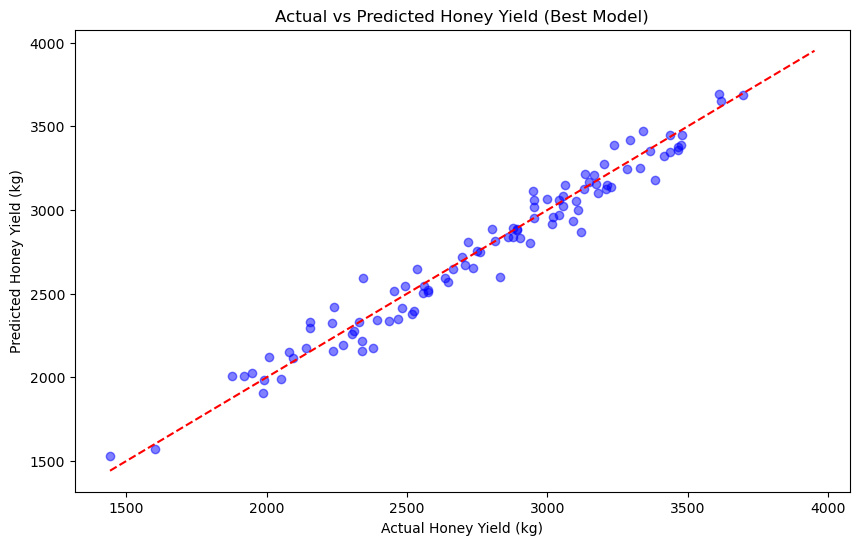

In [54]:
# Plot Actual vs Predicted values for the best model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_model.predict(X_test), color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Honey Yield (kg)')
plt.ylabel('Predicted Honey Yield (kg)')
plt.title('Actual vs Predicted Honey Yield (Best Model)')
plt.show()


In [55]:
# Save the best-performing model using pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")


Best model saved as 'best_model.pkl'
